In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing dataset
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [3]:
list(df)

['status',
 'card_present_flag',
 'bpay_biller_code',
 'account',
 'currency',
 'long_lat',
 'txn_description',
 'merchant_id',
 'merchant_code',
 'first_name',
 'balance',
 'date',
 'gender',
 'age',
 'merchant_suburb',
 'merchant_state',
 'extraction',
 'amount',
 'transaction_id',
 'country',
 'customer_id',
 'merchant_long_lat',
 'movement',
 'Month']

In [4]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
Month                    0
dtype: int64

In [5]:
#Dropping irrelevant columns/features
df.drop(['card_present_flag','bpay_biller_code','merchant_code','currency','country'],axis=1,inplace=True)

In [6]:
list(df)

['status',
 'account',
 'long_lat',
 'txn_description',
 'merchant_id',
 'first_name',
 'balance',
 'date',
 'gender',
 'age',
 'merchant_suburb',
 'merchant_state',
 'extraction',
 'amount',
 'transaction_id',
 'customer_id',
 'merchant_long_lat',
 'movement',
 'Month']

### Currency and country columns were dropped because they had the same value _'AUD'_ and _'Australia'_ throughout the dataset.

### Creating a new column- "__total_amount__"

In [7]:
df_total = df.groupby("customer_id").sum()

In [8]:
total = []
for i in df['customer_id']:
    total.append(int(df_total.loc[i]['amount']))   

In [9]:
df['total_amount'] = total

### Modifying data to find the salary of the customers

In [10]:
df_salary = df[df["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()

In [11]:
df_salary.head()

,balance,age,amount,Month,total_amount
customer_id,,,,,
CUS-1005756958,4718.665385,53.0,970.47,9.076923,16268.0
CUS-1117979751,11957.202857,21.0,3578.65,9.142857,33984.0
CUS-1140341822,5841.720000,28.0,1916.51,9.000000,17010.0
CUS-1147642491,8813.467692,34.0,1711.39,9.076923,28980.0
CUS-1196156254,23845.717143,34.0,3903.73,8.857143,36050.0


In [12]:
df_salary.shape

(100, 5)

### Thus we can now get the salary of all the 100 customers in our dataset.

In [13]:
salary = []
for i in df['customer_id']:
    salary.append(int(df_salary.loc[i]['amount']))   

In [14]:
# Creating a new column salary in our dataset
df['salary'] = salary

In [15]:
df.sample()

,status,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,Month,total_amount,salary
9116,posted,ACC-4059612845,130.98 -12.49,PAYMENT,NaN,Jonathan,58961.93,2018-10-10,M,38,...,NaN,2018-10-10T02:00:00.000+0000,77.0,0e59c039ddf045188de07b534d82f880,CUS-495599312,NaN,debit,10,21502,2647


### Picking features for Predictive Analysis.

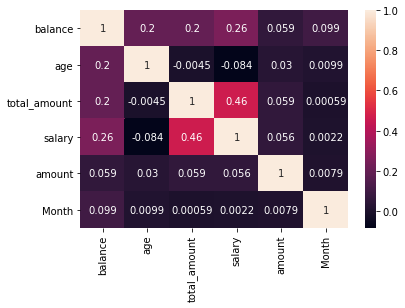

In [16]:
import seaborn as sns
#Heatmap for numerical variables
corr = df[['balance','age','total_amount','salary','amount','Month']].corr()
sns.heatmap(corr,annot = True);

### Thus, the variables balance and total_amount can be used to predict the salary of the customer.

# Predictive Analysis

## Applying Multiple Linear Regression model 

## Data Preprocessing

In [17]:
list(df)

['status',
 'account',
 'long_lat',
 'txn_description',
 'merchant_id',
 'first_name',
 'balance',
 'date',
 'gender',
 'age',
 'merchant_suburb',
 'merchant_state',
 'extraction',
 'amount',
 'transaction_id',
 'customer_id',
 'merchant_long_lat',
 'movement',
 'Month',
 'total_amount',
 'salary']

In [18]:
#Making a copy of the dataset
trans = df.copy()

In [19]:
trans.isnull().sum()

status                  0
account                 0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
customer_id             0
merchant_long_lat    4326
movement                0
Month                   0
total_amount            0
salary                  0
dtype: int64

In [20]:
#Dropping useless columns
trans.drop(['status','account','long_lat','merchant_id','first_name','extraction','amount','transaction_id',
 'customer_id','merchant_suburb','date','txn_description','age','Month','merchant_long_lat','movement'],axis=1,inplace=True)

In [21]:
list(trans)

['balance', 'gender', 'merchant_state', 'total_amount', 'salary']

In [22]:
#Checking for missing values
trans.isnull().sum()

balance              0
gender               0
merchant_state    4326
total_amount         0
salary               0
dtype: int64

In [23]:
#Dropping all rows having missing values
trans.dropna(axis=0,inplace=True)

In [24]:
#Checking for missing values
trans.isnull().sum()

balance           0
gender            0
merchant_state    0
total_amount      0
salary            0
dtype: int64

In [25]:
trans.shape

(7717, 5)

In [26]:
trans.head()

,balance,gender,merchant_state,total_amount,salary
0,35.39,F,QLD,26211,1013
1,21.20,F,NSW,26211,1013
2,5.71,M,NSW,23696,1002
3,2117.22,F,QLD,19286,892
4,17.95,F,QLD,26211,1013


In [27]:
trans.dtypes

balance           float64
gender             object
merchant_state     object
total_amount        int64
salary              int64
dtype: object

In [28]:
#Converting gender and merchant state to categorical types
trans = trans.astype({"gender":'category', "merchant_state":'category'}) 

In [29]:
trans.dtypes

balance            float64
gender            category
merchant_state    category
total_amount         int64
salary               int64
dtype: object

In [30]:
#Importing the trans
X = trans.iloc[:, :-1].values
y = trans.iloc[:, -1].values

In [31]:
print(X)

[[35.39 'F' 'QLD' 26211]
 [21.2 'F' 'NSW' 26211]
 [5.71 'M' 'NSW' 23696]
 ...
 [45394.57 'M' 'NSW' 33459]
 [11350.67 'M' 'VIC' 18680]
 [5517.91 'M' 'NSW' 21006]]


In [33]:
print(y)

[1013 1013 1002 ... 4054 1043  996]


### Encoding

In [34]:
#For gender column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [35]:
print(X)

[[1.0 0.0 35.39 'QLD' 26211]
 [1.0 0.0 21.2 'NSW' 26211]
 [0.0 1.0 5.71 'NSW' 23696]
 ...
 [0.0 1.0 45394.57 'NSW' 33459]
 [0.0 1.0 11350.67 'VIC' 18680]
 [0.0 1.0 5517.91 'NSW' 21006]]


In [36]:
#For merchant_state column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [37]:
print(X)

[[0.0 0.0 0.0 ... 0.0 35.39 26211]
 [0.0 1.0 0.0 ... 0.0 21.2 26211]
 [0.0 1.0 0.0 ... 1.0 5.71 23696]
 ...
 [0.0 1.0 0.0 ... 1.0 45394.57 33459]
 [0.0 0.0 0.0 ... 1.0 11350.67 18680]
 [0.0 1.0 0.0 ... 1.0 5517.91 21006]]


### Splitting the dataset into the Training set and Test set

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Training the model on training set

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predicting the test set results

In [40]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1654.98 1068.  ]
 [2289.21 2887.  ]
 [1337.42  596.  ]
 ...
 [1688.86  916.  ]
 [2305.37 2886.  ]
 [1643.76 2470.  ]]


## Evaluating the model's performance using the _R2 metric_

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.23552848024936135

# Thus, using the multiple linear regression model on the given dataset, we get R^2 metric's value as 0.2355 which indicated that the model has performed very poorly on our dataset and that it is not suitable for our predictive analysis.
## Following R^2 values were obtained after applying several machine learning regression algorithms on our dataset:
 - Multiple Linear Regression: __0.2355__
 - Polynomial Regression : __-14.64__
 - Support Vector Regression : __0.421__


## Applying Decision Tree Regression algorithm

### Using the trans dataset

In [42]:
#Importing the trans
X = trans.iloc[:, :-1].values
y = trans.iloc[:, -1].values

In [43]:
print(X)

[[35.39 'F' 'QLD' 26211]
 [21.2 'F' 'NSW' 26211]
 [5.71 'M' 'NSW' 23696]
 ...
 [45394.57 'M' 'NSW' 33459]
 [11350.67 'M' 'VIC' 18680]
 [5517.91 'M' 'NSW' 21006]]


In [44]:
print(y)

[1013 1013 1002 ... 4054 1043  996]


## Encoding

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [46]:
print(X)

[[1.0 0.0 35.39 'QLD' 26211]
 [1.0 0.0 21.2 'NSW' 26211]
 [0.0 1.0 5.71 'NSW' 23696]
 ...
 [0.0 1.0 45394.57 'NSW' 33459]
 [0.0 1.0 11350.67 'VIC' 18680]
 [0.0 1.0 5517.91 'NSW' 21006]]


In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [48]:
print(X)

[[0.0 0.0 0.0 ... 0.0 35.39 26211]
 [0.0 1.0 0.0 ... 0.0 21.2 26211]
 [0.0 1.0 0.0 ... 1.0 5.71 23696]
 ...
 [0.0 1.0 0.0 ... 1.0 45394.57 33459]
 [0.0 0.0 0.0 ... 1.0 11350.67 18680]
 [0.0 1.0 0.0 ... 1.0 5517.91 21006]]


## Splitting the dataset into the Training set and Test set

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Decision Tree Regression model on the Training set

In [50]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Predicting the Test set results

In [51]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1068. 1068.]
 [2887. 2887.]
 [ 596.  596.]
 ...
 [ 916.  916.]
 [2886. 2886.]
 [2470. 2470.]]


## Evaluating model performance

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9956717483899056

## Thus, after applying the decision tree regression model on our dataset, we get a R^2 value of 0.995 which means that our model has performed really well on the dataset.

# Thus, after applying a variety of regression algorithms, we can conclude that decision tree regression model is the best fit for our analysis and can be used for the above trained model can be used for any further predictive analysis.